<h2> <center> Rostom GHARBI </center> </h2>
<center> mohamed-rostom.gharbi@polytechnique.edu </center>

In [1]:
# Different imports that will be needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the data set 

In [2]:
data_train = pd.read_csv('nba_logreg.csv')

In [3]:
data_train.shape

(1340, 21)

In [4]:
data_train.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
data_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## Undrestanding the features 

In [6]:
data_train.columns.values

array(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'TARGET_5Yrs'], dtype=object)

<b>GP :</b> Games Played. <br>
<b>MIN :</b> Minutes Played. <br>
<b>PTS :</b> Points Scored. <br>
<b>FGM :</b> Field Goals Made. <br>
<b>FGA :</b> Field Goals Attempted. <br>
<b>FG% :</b> Successful Field Goals Percentage. <br>
<b>3P Made :</b> 3 Points Made. <br>
<b>3PA :</b> 3 Points Attempted. <br>
<b>3P% :</b> Successful 3 Points Percentage. <br>
<b>FTM :</b> Free Throws Made. <br>
<b>FTA :</b> Free Throws Attempted. <br>
<b>FT% :</b> Successful Free Throws Percentage. <br>
<b>OREB :</b> Offensive Rebounds. <br>
<b>DREB :</b> Defensive Rebounds. <br>
<b>REB :</b> Rebounds. <br>
<b>AST :</b> Assists. <br>
<b>STL :</b> Steals. <br>
<b>BLK :</b> Blocked shots. <br>
<b>TOV :</b> Turn-over. <br>
<b>TARGET_5Yrs :</b> Target variable. If the played will be successful in NBA in 5 years. <br>

------------------------------------

<b> Interpretation : </b> <br> <br>

After a first glance at the dataset we're having, we can see that there are several features that are highly correlated. For instance, we can see that <b>REB = OREB + DREB</b>. These 3 columns are linearly correlated. If we're ever going to use linear based models to make our binary classification such as logistic regression, this may cause a problem. 

## Checking the data distribution

In [7]:
print('Target value :', 0, ' ---- Frequency in the data set : ', data_train['TARGET_5Yrs'].value_counts()[0])
print('Target value :', 1, ' ---- Frequency in the data set : ', data_train['TARGET_5Yrs'].value_counts()[1])

Target value : 0  ---- Frequency in the data set :  509
Target value : 1  ---- Frequency in the data set :  831


The dataset we have seems to be balanced. There is no need to apply some upsampling techniques such as SMOTE. 

## Checking the missing values

In [8]:
data_train.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [9]:
data_train[ data_train['3P%'].isna()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


As we can see here, 3P% in missing when the player did not attempt a 3 points. These NaN values can be replaced by 0. 

In [10]:
data_train['3P%'].fillna(0, inplace=True)

## Features distribution : 

In this section, since all our features are numerical, we will check their distributions and see if we can modify some of them to achieve better results.

In [11]:
def plot_hist(data, column_name, log=False):
    vals = data[column_name]
    if log: vals = np.log(vals + np.finfo(float).eps)
    print('The mean value is :' , round(vals.mean(),2))
    print('The median value is :' , vals.median())
    plt.figure(figsize=(15,6))
    sns.distplot(vals, label=column_name + '_distribution')
    plt.axvline(x=vals.mean(), color='red', linestyle='--', label='Mean value')
    plt.axvline(x=vals.median(), color='black', linestyle='--', label='Median value')
    if log : plt.title('Distribution of ' + column_name + "_log")
    else: plt.title('Distribution of ' + column_name)
    plt.legend()
    plt.show()

The mean value is : 60.41
The median value is : 63.0


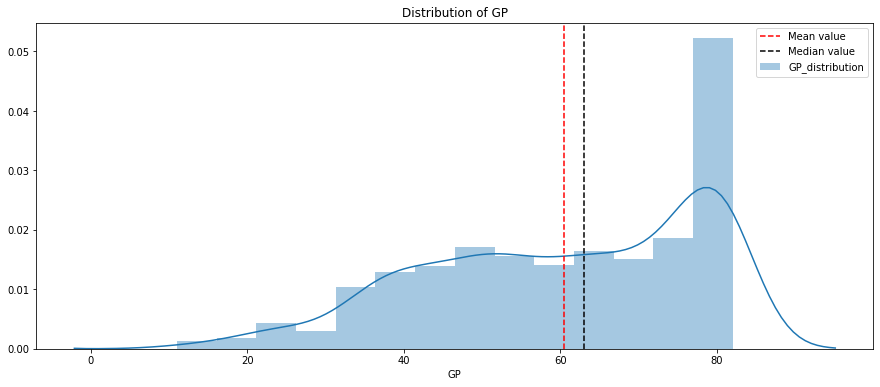

The mean value is : 17.62
The median value is : 16.1


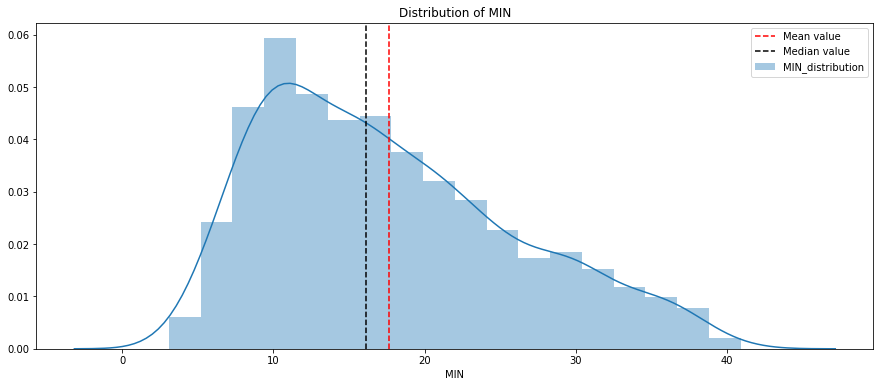

The mean value is : 6.8
The median value is : 5.55


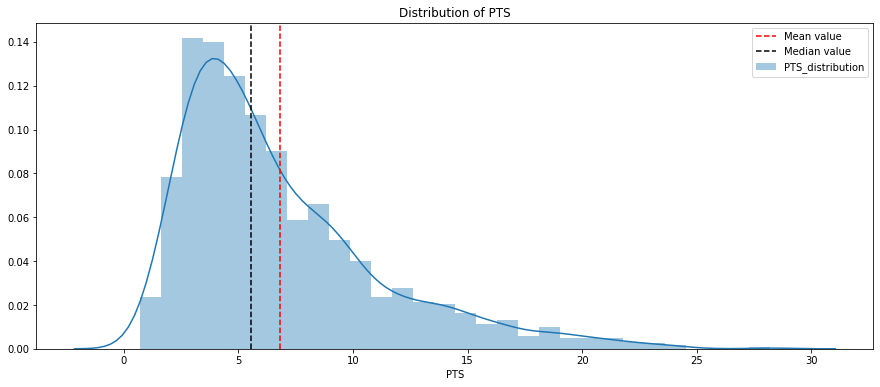

The mean value is : 2.63
The median value is : 2.1


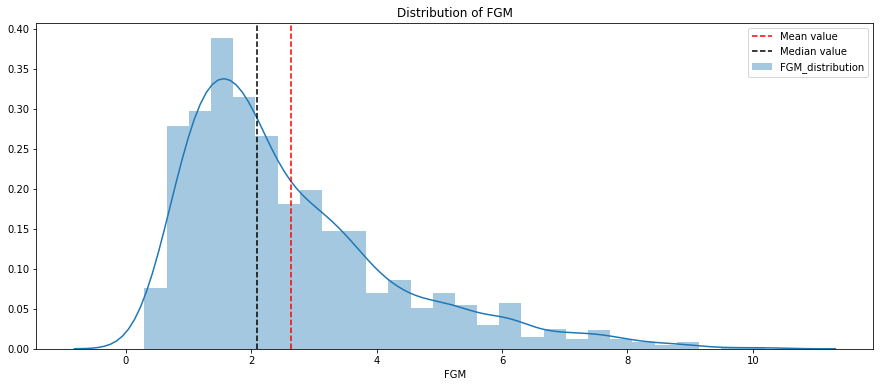

The mean value is : 5.89
The median value is : 4.8


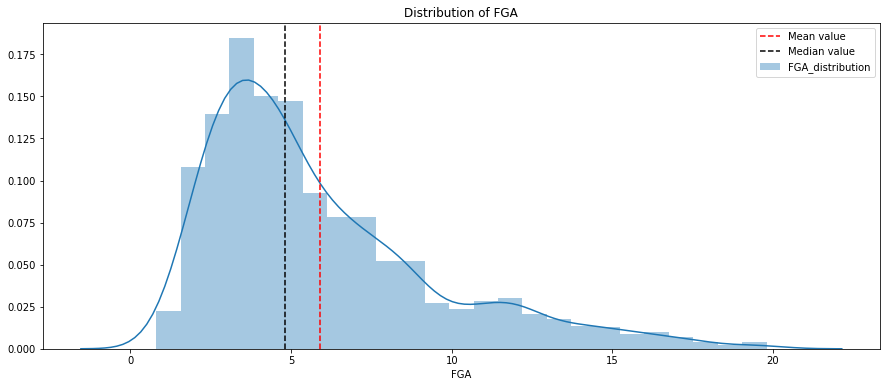

The mean value is : 44.17
The median value is : 44.1


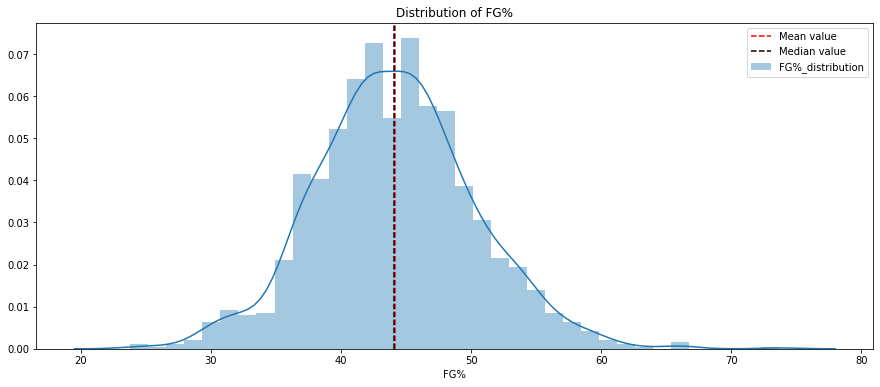

The mean value is : 0.25
The median value is : 0.1


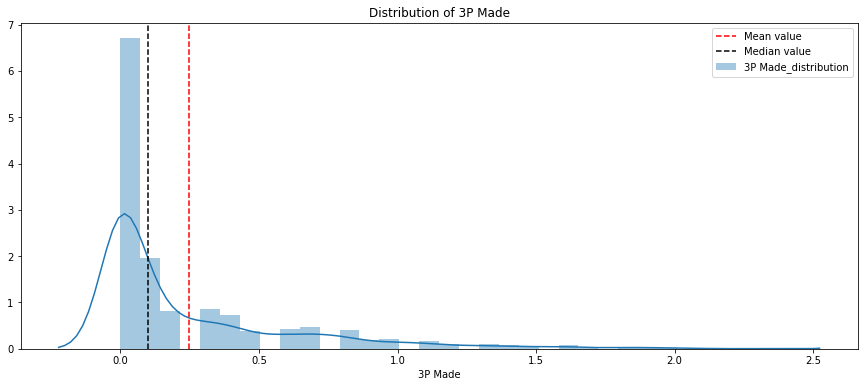

The mean value is : 0.78
The median value is : 0.3


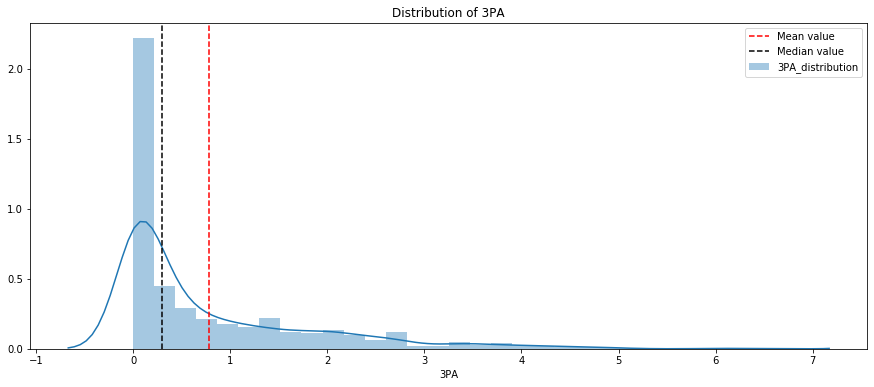

The mean value is : 19.15
The median value is : 22.2


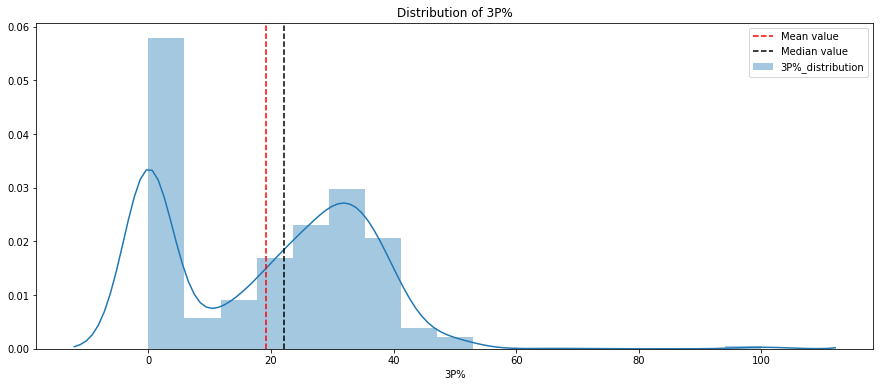

The mean value is : 1.3
The median value is : 1.0


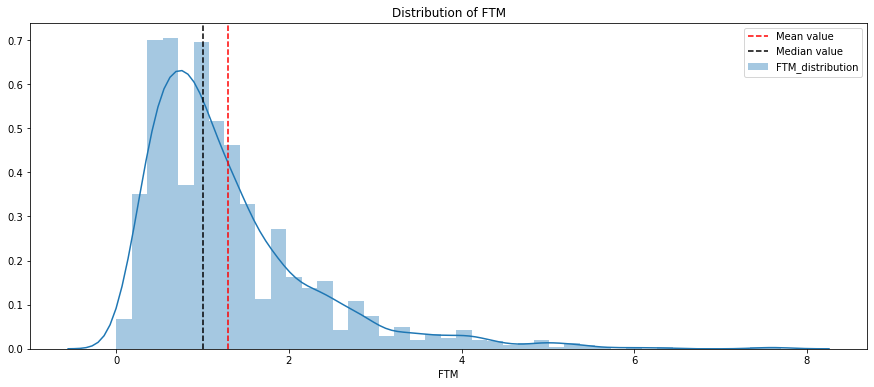

The mean value is : 1.82
The median value is : 1.5


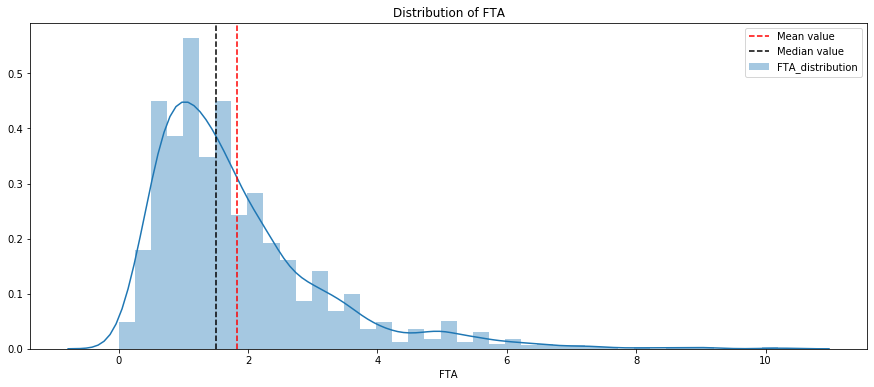

The mean value is : 70.3
The median value is : 71.25


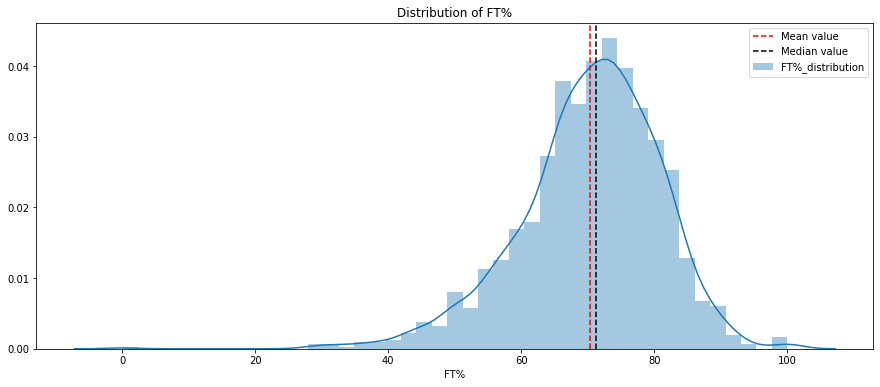

The mean value is : 1.01
The median value is : 0.8


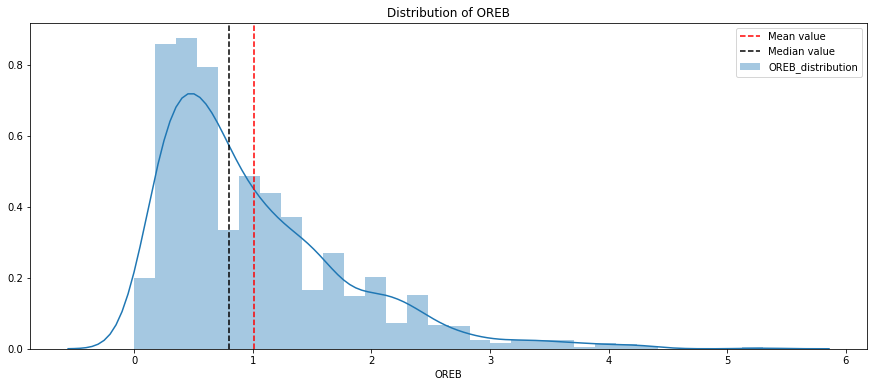

The mean value is : 2.03
The median value is : 1.7


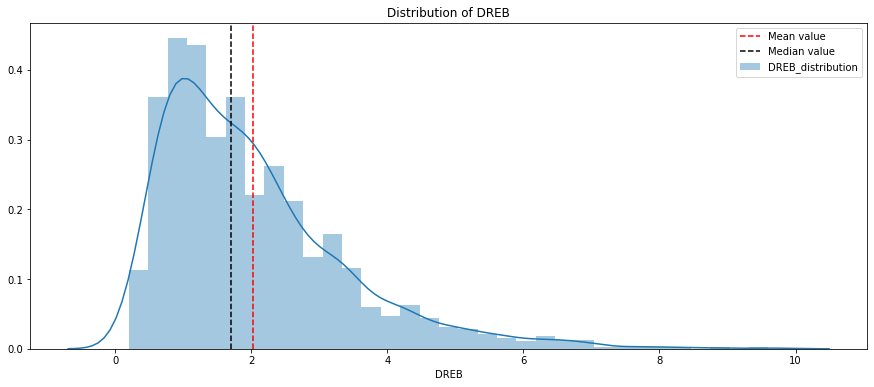

The mean value is : 3.03
The median value is : 2.5


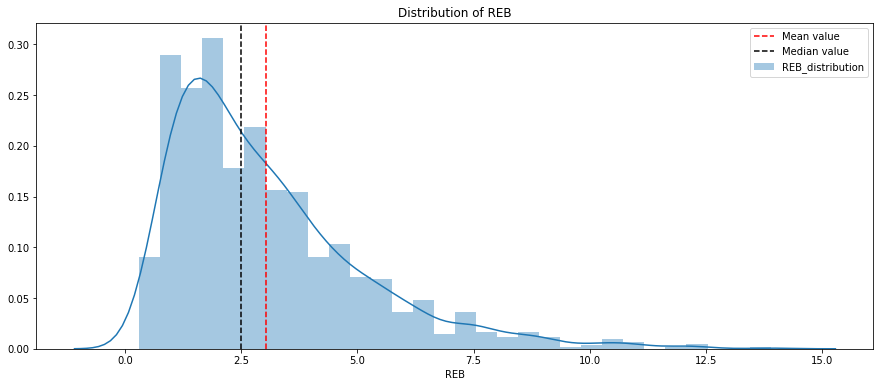

The mean value is : 1.55
The median value is : 1.1


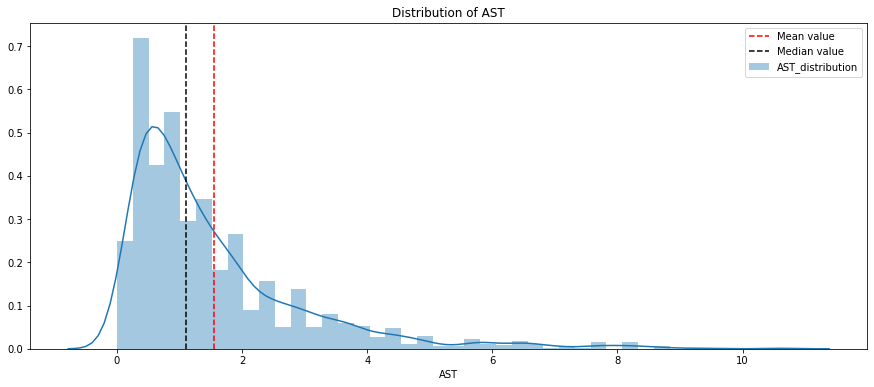

The mean value is : 0.62
The median value is : 0.5


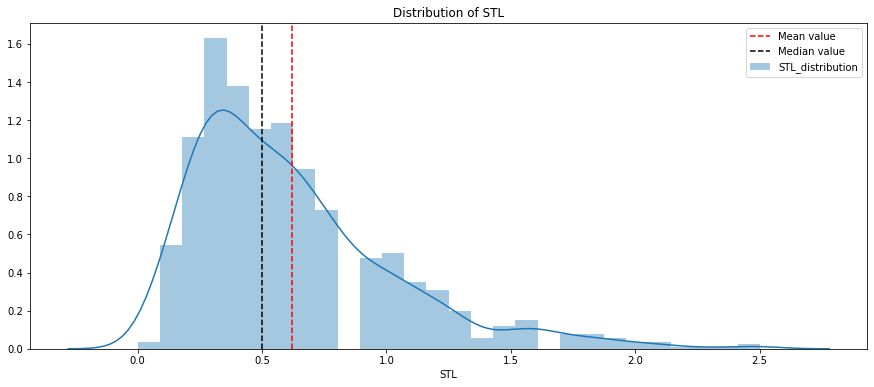

The mean value is : 0.37
The median value is : 0.2


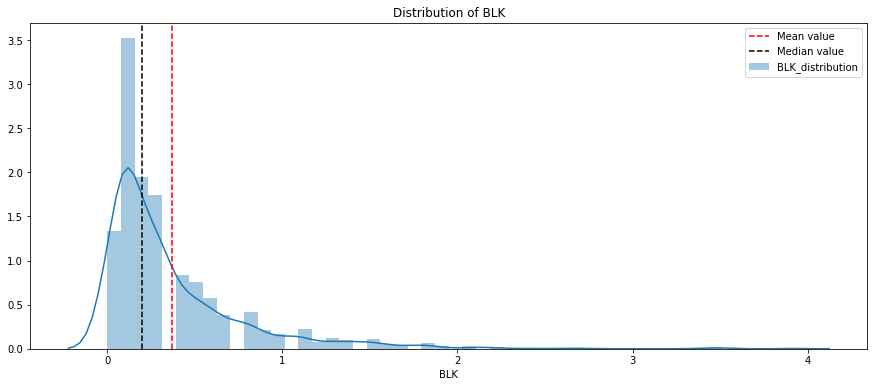

The mean value is : 1.19
The median value is : 1.0


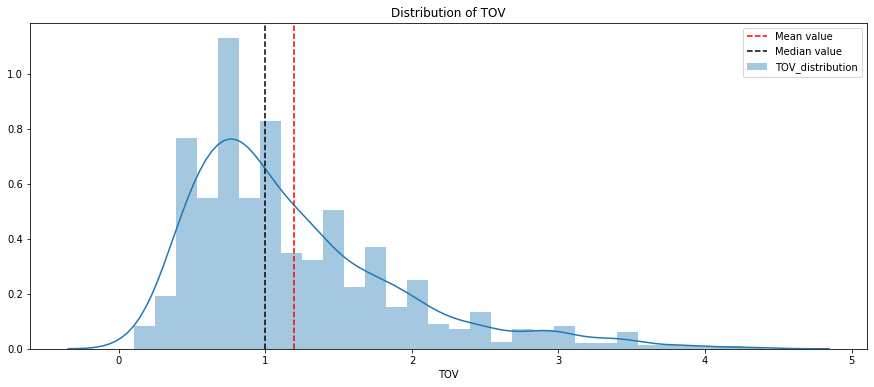

The mean value is : 0.62
The median value is : 1.0


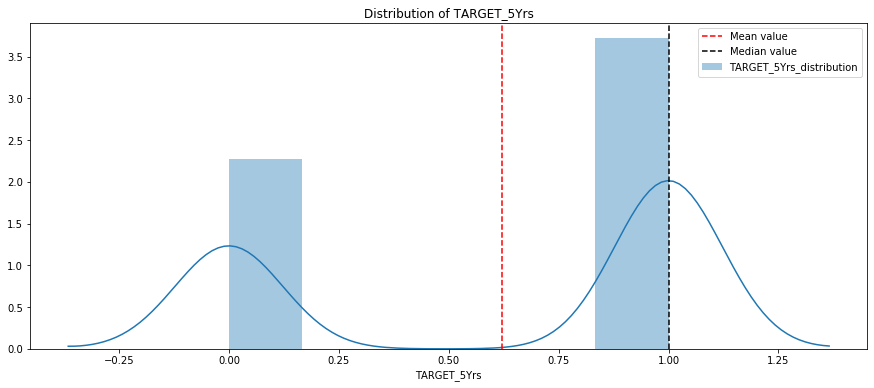

In [12]:
for col in data_train.columns:
    if col == "Name":
        continue
    plot_hist(data_train, col)

We can see on the above graphs that some of the features are left-skewed, applying the log function to these features will assure that we will get better predictions results on our model. If we ever going to use Tree Based models, this approach will allow us to have better splits in the different tree nodes.  <br>

In addition to that, having features with normal-like distribution can allow us to drop and check if we have some outliers in our dataset. <br> <br>

The features that are left-skewed on which we can apply the log function are the following : <br> <br>
<center>'MIN','PTS','FGM','FGA','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TOV'.</center>

Columns with <b>normal distribution</b> : 

The mean value is : 60.41
The median value is : 63.0


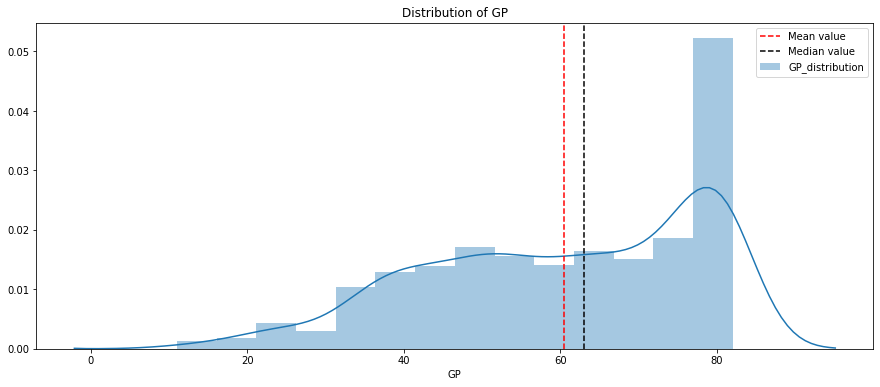

The mean value is : 2.75
The median value is : 2.7788192719904172


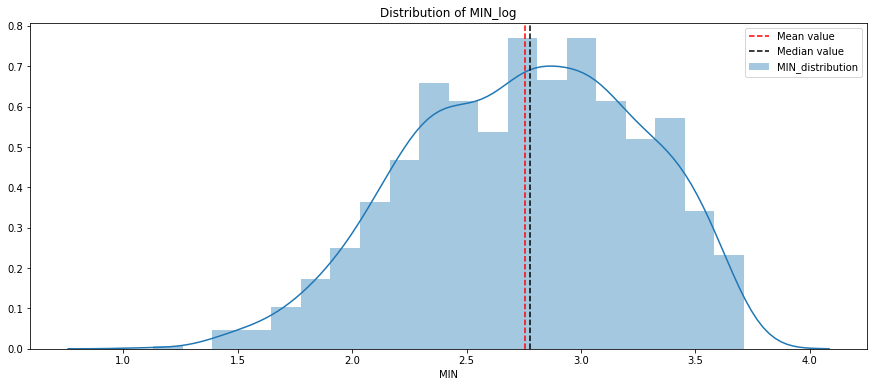

The mean value is : 1.73
The median value is : 1.7137573449897645


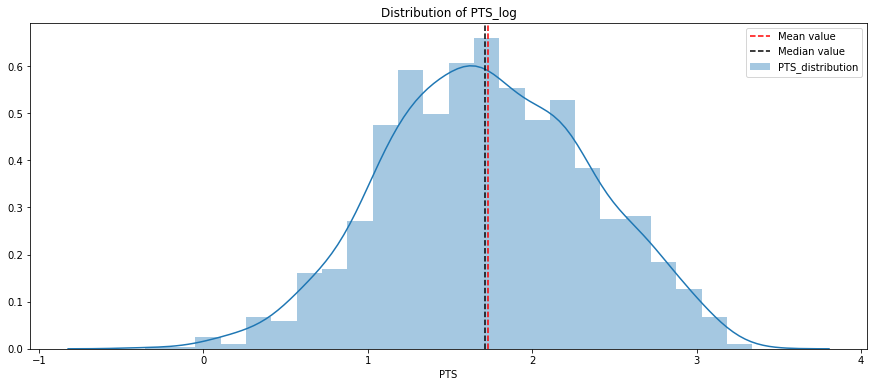

The mean value is : 0.78
The median value is : 0.7419373447293776


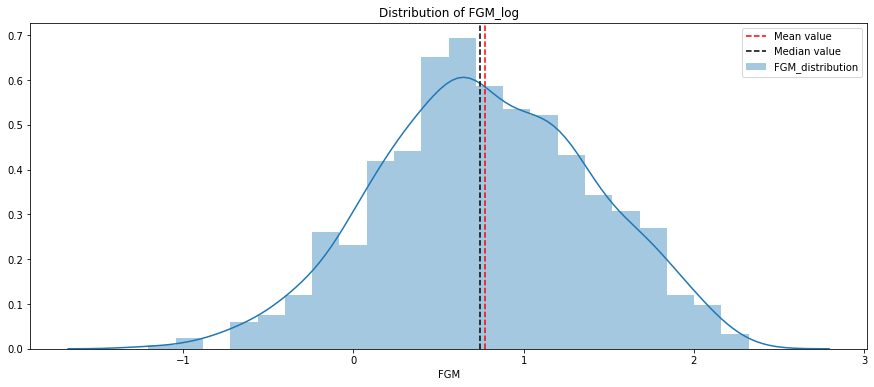

The mean value is : 1.6
The median value is : 1.5686159179138452


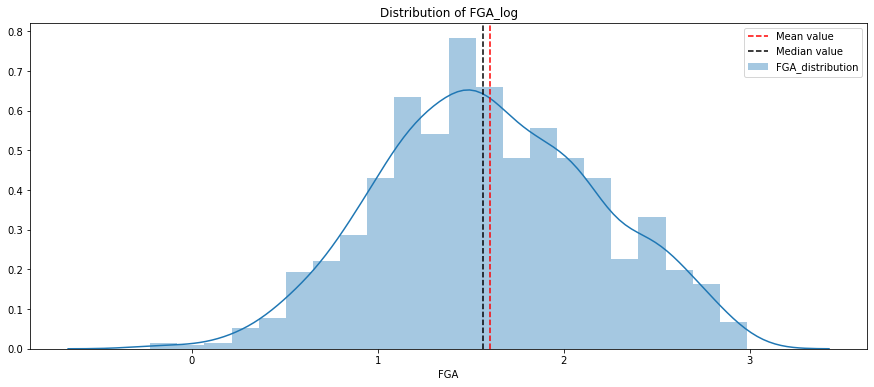

The mean value is : 44.17
The median value is : 44.1


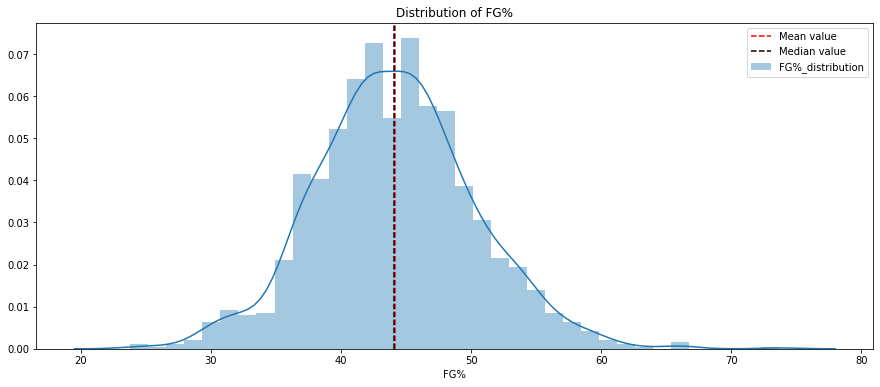

The mean value is : 0.25
The median value is : 0.1


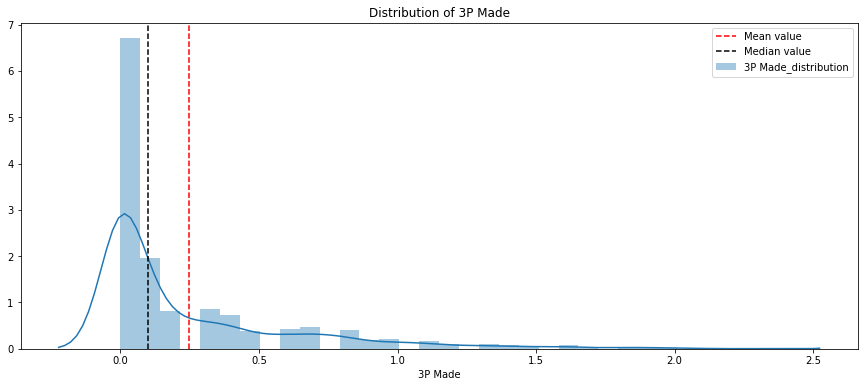

The mean value is : 0.78
The median value is : 0.3


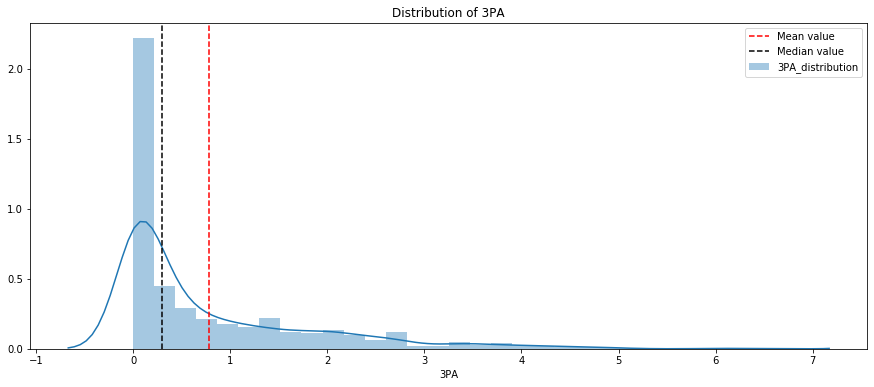

The mean value is : 19.15
The median value is : 22.2


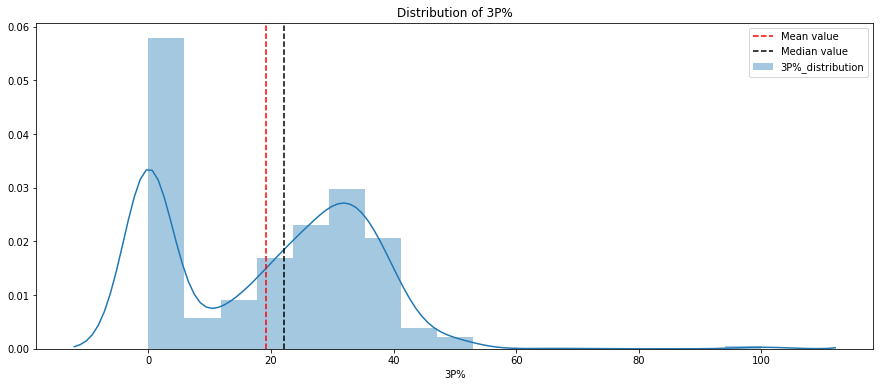

The mean value is : -0.02
The median value is : 2.2204460492503128e-16


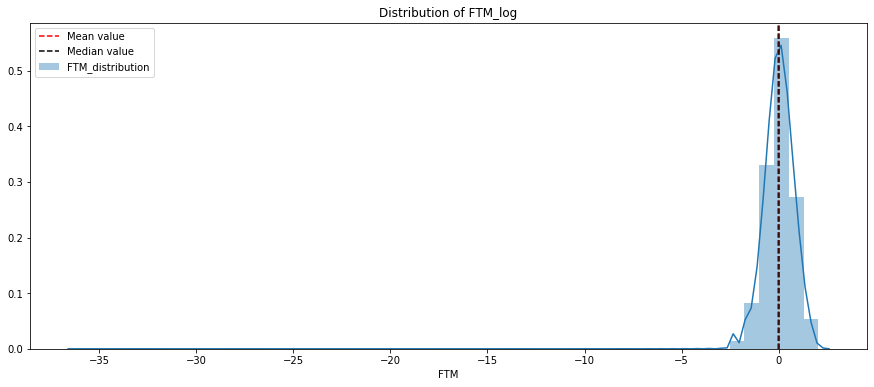

The mean value is : 0.34
The median value is : 0.40546510810816455


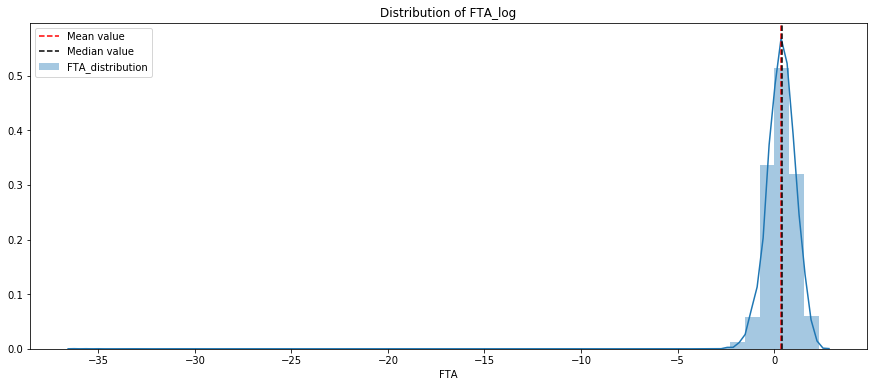

The mean value is : 70.3
The median value is : 71.25


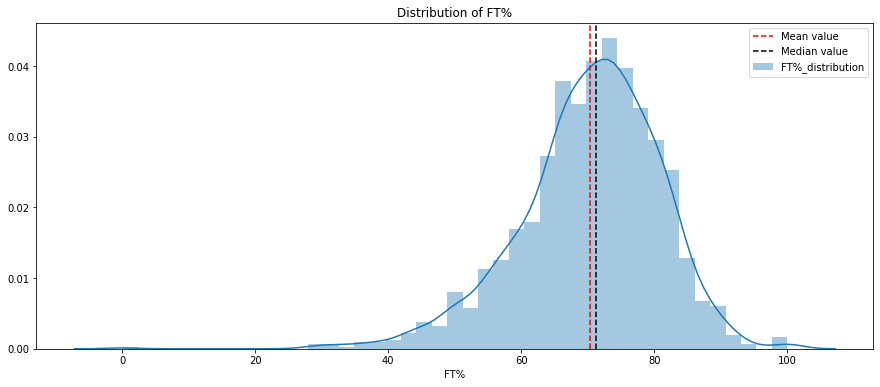

The mean value is : -0.39
The median value is : -0.22314355131420943


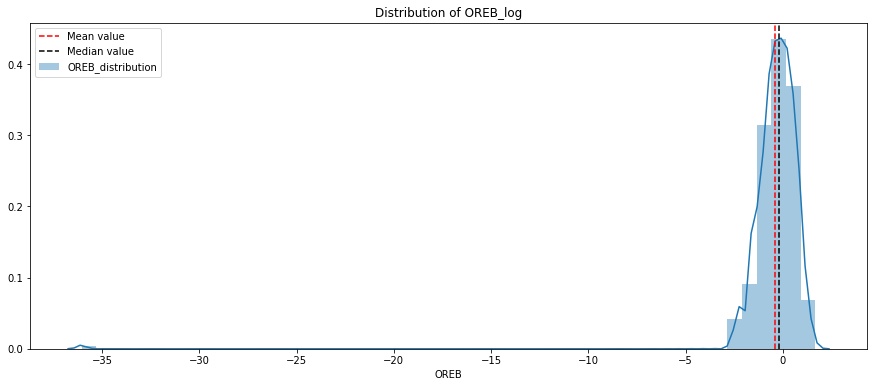

The mean value is : 0.49
The median value is : 0.5306282510621705


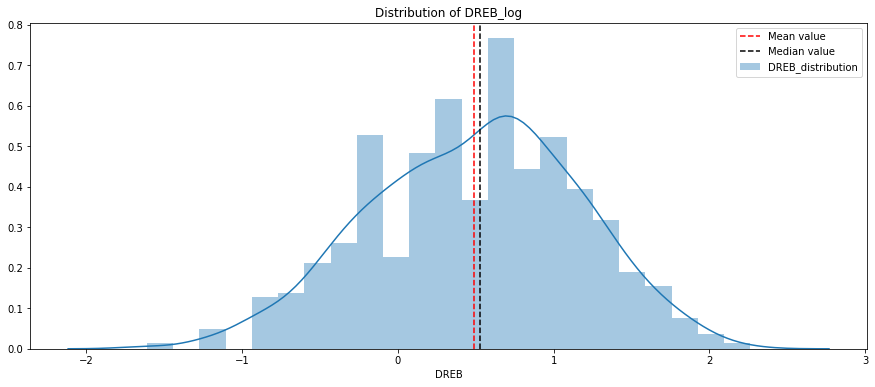

The mean value is : 0.89
The median value is : 0.9162907318741551


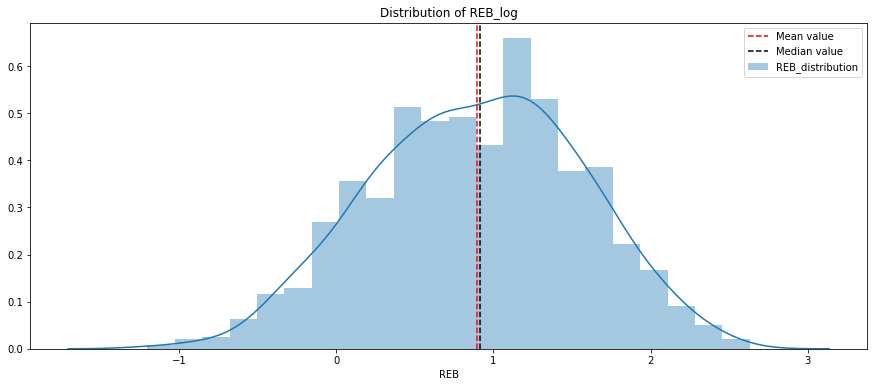

The mean value is : -0.05
The median value is : 0.09531017980432514


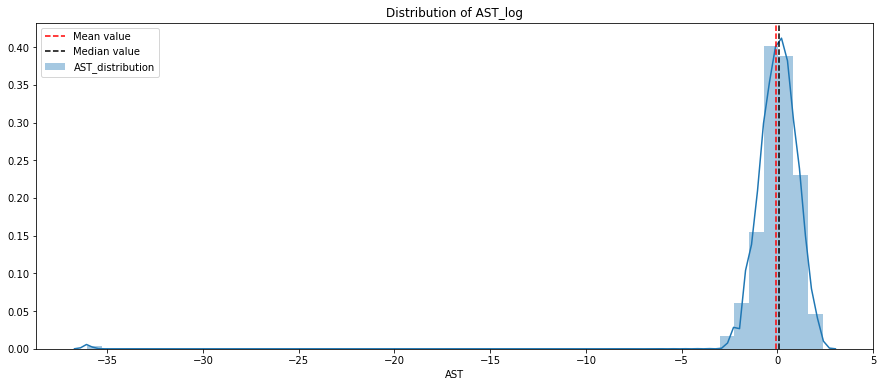

The mean value is : -0.8
The median value is : -0.6931471805599448


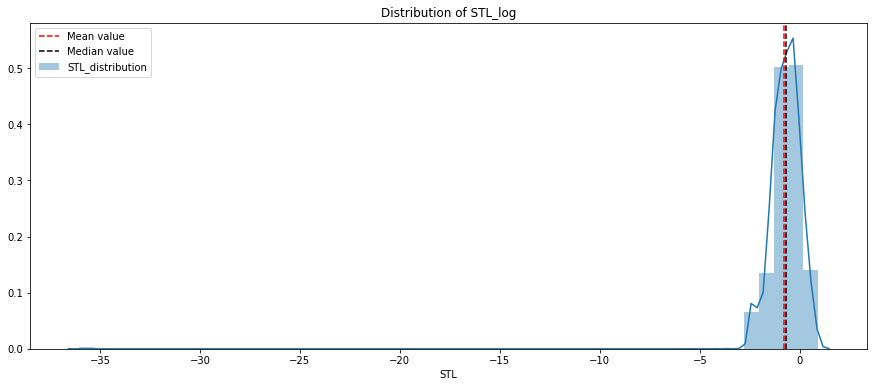

The mean value is : -4.89
The median value is : -1.6094379124340992


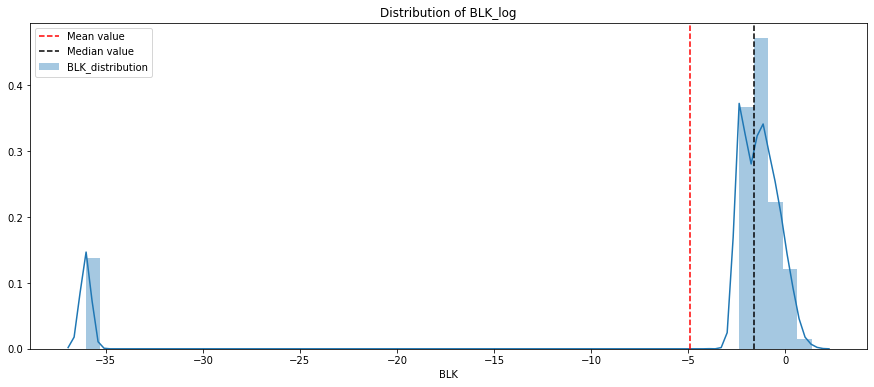

The mean value is : 0.0
The median value is : 2.2204460492503128e-16


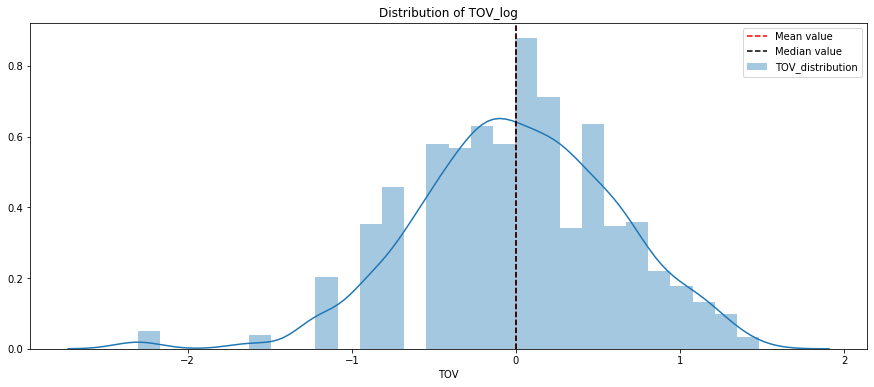

The mean value is : 0.62
The median value is : 1.0


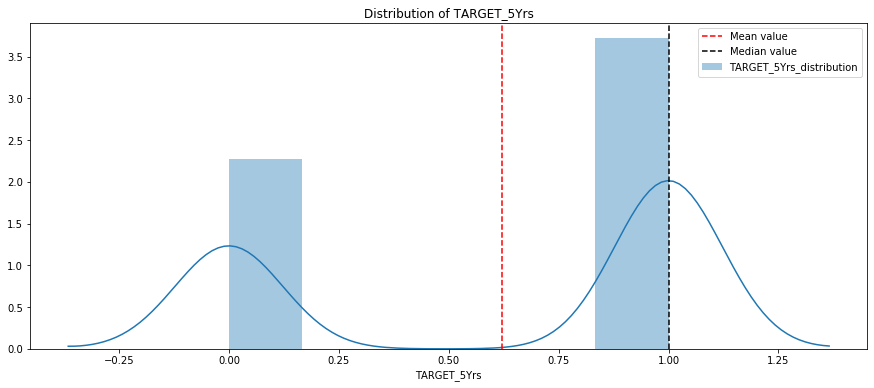

In [13]:
for col in data_train.columns:
    if col == "Name":
        continue
    if col in {'MIN','PTS','FGM','FGA','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TOV'}: plot_hist(data_train, col, log=True)
    else: plot_hist(data_train, col)

In [14]:
to_log_cols = {'MIN','PTS','FGM','FGA','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TOV'}
df_log = data_train.copy()
for col in to_log_cols:
    df_log[col] = np.log(data_train[col]+np.finfo(float).eps)

## Train different models

In [15]:
# Different important imports to train the model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as xgb
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

#DL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In this part of the project, I will try different models to make the provided binary classification. I will start of by using a simple model like logstic regression and then try more advanced ones.

To compare the different models, I will use the provided scoring function which divides the dataset into 3 folds, train on two on them and validate on the remaining one. 

I will add more metrics to that scoring function to have a better knowledge on the performance of the models.

In [16]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [17]:
def make_ann_model():
    
    model = Sequential()
    
    #Input dim is 19 since we removed the Name Column and the target column
    model.add(Dense(units = 19, kernel_initializer='glorot_uniform', activation = 'relu', 
                     input_dim = 19))

    model.add(Dense(units = 64, kernel_initializer='glorot_uniform', activation = 'relu'))

    model.add(Dense(units = 128, kernel_initializer='glorot_uniform', activation = 'relu'))
    
    #To avoid overfitting
    model.add(Dropout(0.2))

    model.add(Dense(units = 64, kernel_initializer='glorot_uniform', activation = 'relu'))

    #Sigmoid activation function for binary classification
    model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
    
    #Compilation of ANN
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                       metrics = [f1])
    
    return model

This is a useful callback if we ever want to use the model who has the best roc auc score. As explained ealier, I will stick to the F1 score.

In [18]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict_proba(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict_proba(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        #print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

In [19]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Support Vector Classifier', SVC(gamma='auto', probability=True)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Random Forest Classifier', RandomForestClassifier(max_depth=4)))
models.append(('Xgboost', xgb(eval_metric=["logloss"],objective='binary:logistic')))
models.append((('Deep Learning Model'), make_ann_model()))

## Metrics 

The objective of our model is to make a binary classification on whether the basket ball player will succeed in NBA in 5 years. 

To do so, there are several binary classification metrics that can be used depending on the data distribution we have. <br> <br>
 
<b> Accuracy : </b> <br>
This is the simplest metric for binary classification. It measures the fraction of all instances that are correctly categorized; it is the ratio of the number of correct classifications to the total number of correct or incorrect classifications. <br> <br>

<center> Accuracy = $\frac{TP + TN}{Total Population} = \frac{TP + TN}{TP + TN + FP + FN}$ </center> <br> <br> <br>

<b> Precision : </b> <br>
Precision gives us an information on our binary classification model ability to identify only the relevant data points. <br> <br>

<center> Precision = $\frac{TP}{TP + FP}$ </center> <br> <br> <br>

<b> Recall : </b> <br>
Recall is an important metric when we deal with unbalanced dataset. This metric expresses the ability to find all relevant instances ( labeled 1 ) in a dataset. <br> <br>

<center> Recall = $\frac{TP}{TP + FN}$ </center> <br> <br> <br>

<b> F1-Score : </b> <br>
The F1 score is the harmonic mean of precision and recall taking both metrics into account in the following equation: <br> <br>

<center> F1 Score = $\frac{2 * Precision * Recall}{Precision + Recall}$ </center> <br> <br> <br>

<b> ROC AUC score : </b> <br>
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between players that will succeed in NBA and those who won't.


<a id='res'></a>
<b> Putting it all together : </b> <br> <br>

The objective of the model is to predict whether a player is <b> worth investing on </b> if ever he will be playing in NBA during the next 5 years based on his playing stats. <br>

Since there will be a lot of money invested on these players, it's very crucial for us to know the players that will actually succeed in NBA. Thus, we need our recall to be close to 1, since by definition recall expresses the ability to find relevant instances ( future successful players in NBA ). 

Also, the investors can be very upset if we ever can not predict a future amazing NBA player with our model. Therefore, our model should also have a high precision ( close to 1 aswell ).

<b> Therefore </b>, the solution here is to use the model that has the highest f1 score, since it's the harmonic mean between precision and recall. 

<b>NB :</b> Using the model that also has the highest ROC AUC score won't be a problem since the higher it is the more we're able to distinguish between the two classes.

In [20]:
def plot_conf_matrix(conf_matrix):
    df_cm = pd.DataFrame(conf_matrix.astype(int), range(2), range(2))
    plt.figure(figsize=(10,5))
    sns.set(font_scale=1)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
def score_classifier(dataset, classifier, labels, DL=False):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    acc = 0
    precision = 0
    f1 = 0
    roc_auc = 0
    
    for training_ids,test_ids in kf.split(dataset):
        
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        
        if DL:
            roc = RocCallback(training_data=(training_set, training_labels),
                  validation_data=(test_set, test_labels))
            
            es = EarlyStopping(monitor='val_f1', patience=20, restore_best_weights=True, mode='max')

            classifier.fit(training_set, training_labels, batch_size = 50, epochs = 500, verbose=0, validation_data=(test_set, test_labels),
          callbacks=[roc,es])
        else:
            classifier.fit(training_set,training_labels)
        
        if DL:
            predicted_labels_probs = classifier.predict(test_set)
            predicted_labels = [1 if p >= 0.5 else 0 for p in predicted_labels_probs]
        else:
            predicted_labels = classifier.predict(test_set)
            predicted_labels_probs = classifier.predict_proba(test_set)

        confusion_mat += confusion_matrix(test_labels,predicted_labels)
        
        recall += recall_score(test_labels, predicted_labels)    
        acc += accuracy_score(test_labels, predicted_labels)
        precision += precision_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)
        
        if DL:
            roc_auc += roc_auc_score(test_labels, predicted_labels_probs)
        else:
            roc_auc += roc_auc_score(test_labels, predicted_labels_probs[:,1])

        
    
    recall /= 3
    acc /= 3
    precision /= 3
    f1 /= 3
    roc_auc /= 3
    print("-"*50)
    print('Accuracy = ', acc)
    print('Precision = ', precision)
    print('Recall = ', recall)
    print('F1-score = ', f1)
    print('ROC AUC score = ', roc_auc)
    plot_conf_matrix(confusion_mat) 

In [22]:
# Here, I am just preparing my data :
train = data_train.drop(columns=['Name','TARGET_5Yrs']).values
targets = data_train['TARGET_5Yrs'].values

# Normalizing the data with the MinMaxScaler. A Standard Scaler could have been used too. 
X = MinMaxScaler().fit_transform(train)

****************************************************************************************************
****************************************************************************************************
Logistic Regression results : 

--------------------------------------------------
Accuracy =  0.709717331621205
Precision =  0.7358442849959373
Recall =  0.8302026964612303
F1-score =  0.7800209227678234
ROC AUC score =  0.7571207575732203


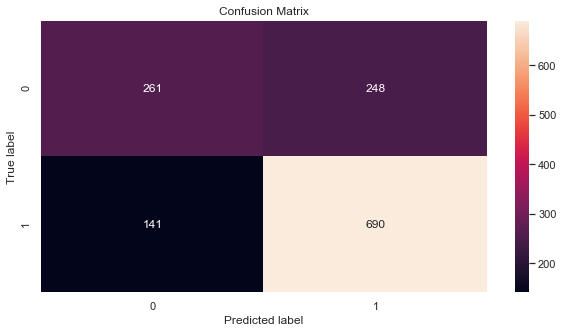

****************************************************************************************************
****************************************************************************************************
KNN results : 

--------------------------------------------------
Accuracy =  0.6686830990860847
Precision =  0.7158780477395181
Recall =  0.7763869623431215
F1-score =  0.7441799853669625
ROC AUC score =  0.6932743134685095


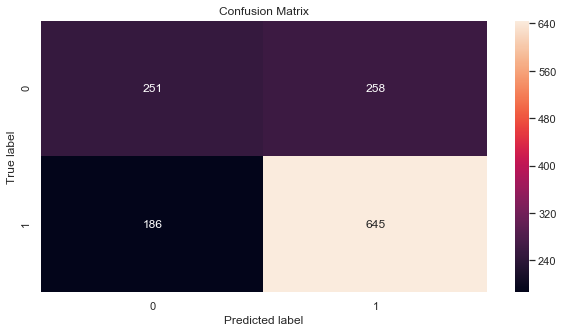

****************************************************************************************************
****************************************************************************************************
Decision Tree Classifier results : 

--------------------------------------------------
Accuracy =  0.6186601926813201
Precision =  0.696541316110153
Recall =  0.6821339738752864
F1-score =  0.6892129836156139
ROC AUC score =  0.598685489690741


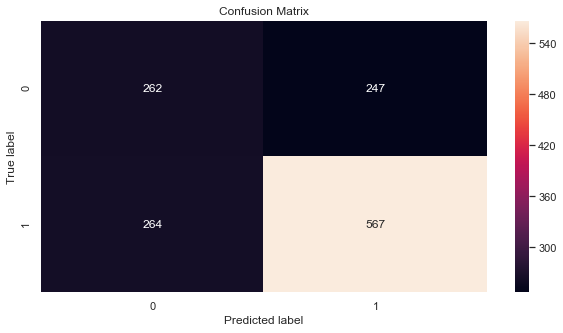

****************************************************************************************************
****************************************************************************************************
Support Vector Classifier results : 

--------------------------------------------------
Accuracy =  0.7082192193095976
Precision =  0.7338224564829963
Recall =  0.8314716437564605
F1-score =  0.7794141096961357
ROC AUC score =  0.7562207500612903


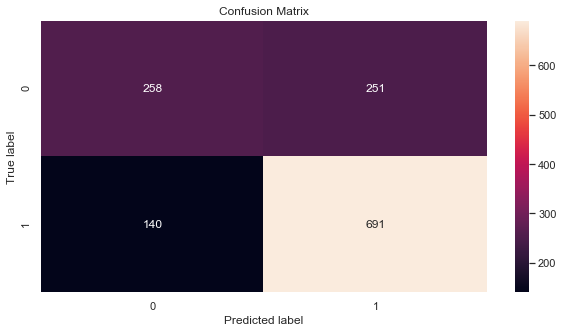

****************************************************************************************************
****************************************************************************************************
LDA results : 

--------------------------------------------------
Accuracy =  0.7000197296041039
Precision =  0.727798409972323
Recall =  0.8253907875719096
F1-score =  0.7731299203738025
ROC AUC score =  0.761377318681543


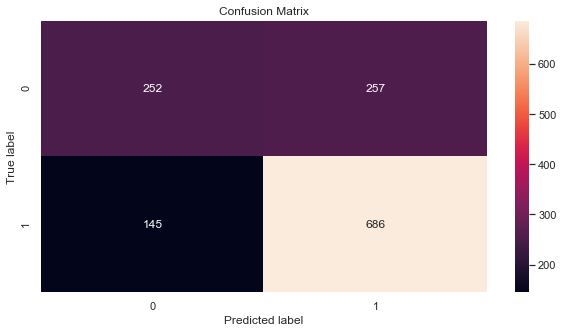

****************************************************************************************************
****************************************************************************************************
Random Forest Classifier results : 

--------------------------------------------------
Accuracy =  0.686591894811114
Precision =  0.7317549969722172
Recall =  0.7807034289251455
F1-score =  0.7551856057860874
ROC AUC score =  0.7256393243014828


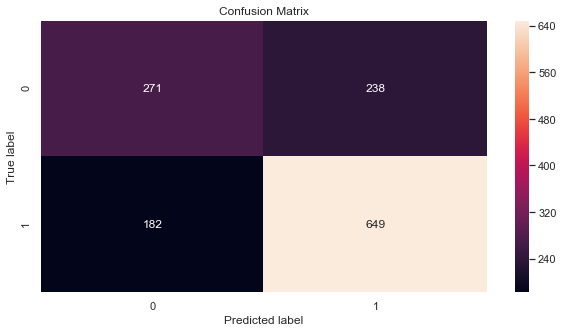

****************************************************************************************************
****************************************************************************************************
Xgboost results : 

--------------------------------------------------
Accuracy =  0.6850904384988112
Precision =  0.723519507522246
Recall =  0.796436499043379
F1-score =  0.7580920139056286
ROC AUC score =  0.737668004903707


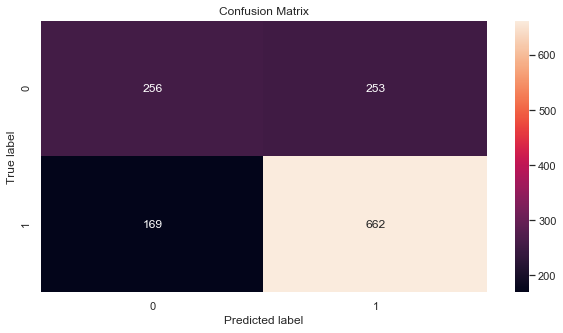

****************************************************************************************************
****************************************************************************************************
Deep Learning Model results : 

--------------------------------------------------
Accuracy =  0.7380961935240083
Precision =  0.7620599739243806
Recall =  0.8447331815692198
F1-score =  0.8004694191793664
ROC AUC score =  0.7868045211848701


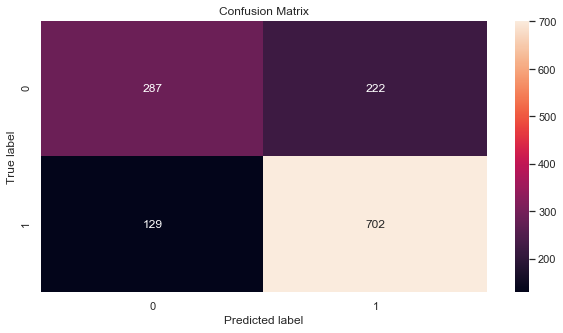

In [23]:
for model_name, model in models:
    print("*"*100)
    print("*"*100)
    print(model_name + " results : \n")
    if 'Deep' in model_name:
        DL=True
    else:
        DL=False
    score_classifier(X, model, targets, DL)

<b>Interpretation : </b> <br> <br>

The model who has the best f1 score is the deep learning model that I've made, with a f1 score equal to 0,80. The other models that also performed well are Logistic Regression, LDA and Support Vector Classifier. 

Tunning these models will result to a better score. To tune these models, a use of the grid search technique or the bayesian hyperparameter search technique or the random search technique can help. I prefer the bayesian search technique for it's rapidity and fast execution. 

Also, some other techniques can be used to achieve better results, like giving more importance to a certain class than an other. The use of the class_weight attribute while training our model can enable us to achieve better results. 

## Trying the same thing with the log dataset :

In [24]:
train_log = df_log.drop(columns=['Name','TARGET_5Yrs']).values
targets = df_log['TARGET_5Yrs'].values
X_log = MinMaxScaler().fit_transform(train_log)

****************************************************************************************************
****************************************************************************************************
Logistic Regression results : 

--------------------------------------------------
Accuracy =  0.7015011219122335
Precision =  0.7245682175379023
Recall =  0.8374884909285424
F1-score =  0.7767965529799854
ROC AUC score =  0.7492297543158215


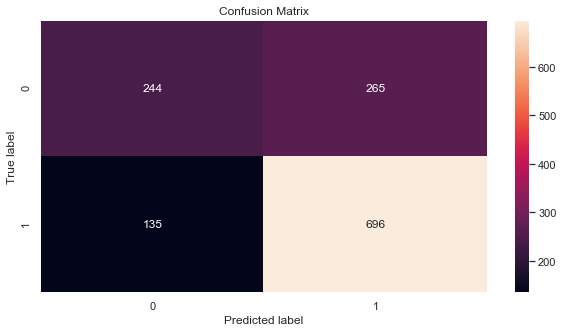

****************************************************************************************************
****************************************************************************************************
KNN results : 

--------------------------------------------------
Accuracy =  0.6656952344646089
Precision =  0.7104144182222387
Recall =  0.7797363280514603
F1-score =  0.743198131021081
ROC AUC score =  0.6822401058382747


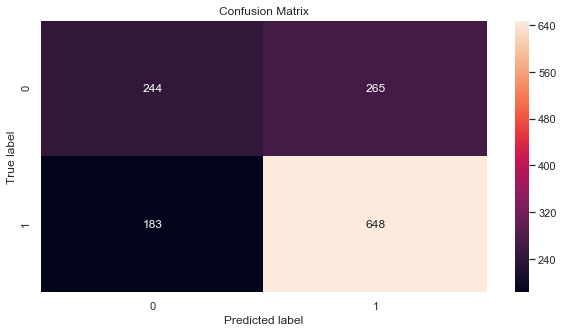

****************************************************************************************************
****************************************************************************************************
Decision Tree Classifier results : 

--------------------------------------------------
Accuracy =  0.6231194176088389
Precision =  0.6996227897256517
Recall =  0.6883254338681475
F1-score =  0.6938649630737855
ROC AUC score =  0.605932004557662


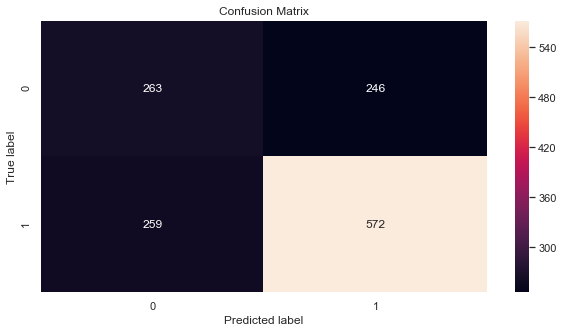

****************************************************************************************************
****************************************************************************************************
Support Vector Classifier results : 

--------------------------------------------------
Accuracy =  0.7074801951558807
Precision =  0.734449005101179
Recall =  0.8302896106595338
F1-score =  0.7789516147074287
ROC AUC score =  0.7505019461599796


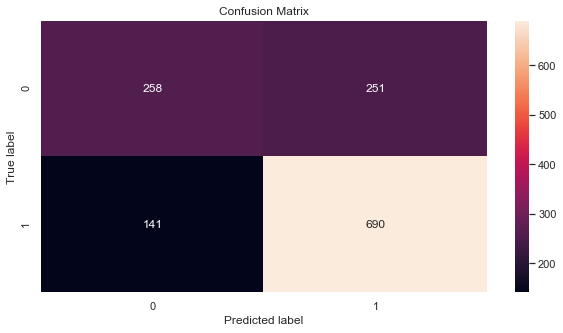

****************************************************************************************************
****************************************************************************************************
LDA results : 

--------------------------------------------------
Accuracy =  0.7074735071544894
Precision =  0.7309048933791141
Recall =  0.83746950786357
F1-score =  0.7801656920077972
ROC AUC score =  0.7488196506107959


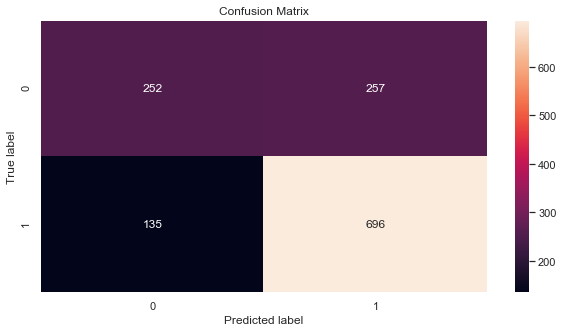

****************************************************************************************************
****************************************************************************************************
Random Forest Classifier results : 

--------------------------------------------------
Accuracy =  0.6918102078965233
Precision =  0.7394688963055671
Recall =  0.778577200140368
F1-score =  0.758117098864114
ROC AUC score =  0.7281683887072031


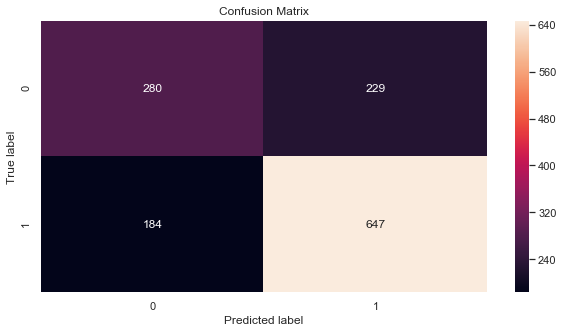

****************************************************************************************************
****************************************************************************************************
Xgboost results : 

--------------------------------------------------
Accuracy =  0.6850904384988112
Precision =  0.723519507522246
Recall =  0.796436499043379
F1-score =  0.7580920139056286
ROC AUC score =  0.7377104767660981


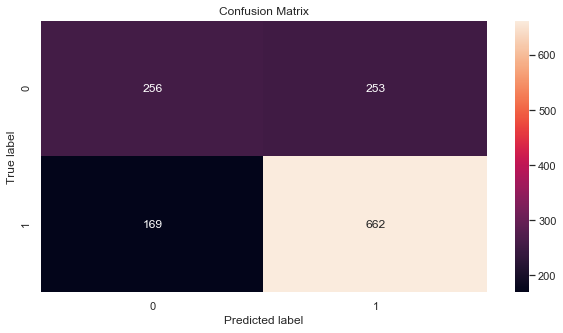

****************************************************************************************************
****************************************************************************************************
Deep Learning Model results : 

--------------------------------------------------
Accuracy =  0.6970368809836712
Precision =  0.7098427170843867
Recall =  0.8676651319564618
F1-score =  0.780469115374892
ROC AUC score =  0.7469694554992387


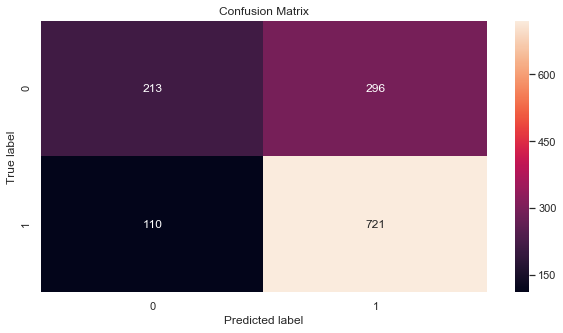

In [25]:
for model_name, model in models:
    print("*"*100)
    print("*"*100)
    print(model_name + " results : \n")
    if 'Deep' in model_name:
        DL=True
    else:
        DL=False
    score_classifier(X_log, model, targets, DL)

<b>Interpretation : </b> <br> <br>
    
The use of the log transformations I made affected principally the Tree Based models such as CART. We can see that it's F1 score improved from 0.67 to 0.68. Also, the Random Forest Classifier who is also a Tree Based model had it's F1 score improve slightly. This approach also helped some other models like LDA.

<b> Conclusion : </b>

I will use the deep learning model since it had the highest <b> F1 score </b> for the reasons I explained [here](#res).

## Using the best model :

In [26]:
final_model = make_ann_model()

In [27]:
y = data_train['TARGET_5Yrs']
data_train = data_train.drop(columns=['Name','TARGET_5Yrs'])

In [28]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.1)

In [29]:
# Scalling carrefuly the Train and test datasets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Using earling stopping callback to avoid over-fitting.
es = EarlyStopping(monitor='val_f1', patience=50, restore_best_weights=True, mode='max')

# Using the ModelCheckpoint callback to save the model's weights who had the best score.
checkpointer = ModelCheckpoint('best_model.h5', monitor='val_f1', mode='max', save_best_only=True)

# Usuful callback to improve model results and check other metrics while training.
roc = RocCallback(training_data=(X_train, y_train),
                  validation_data=(X_test, y_test))

# Training the deep learning model
final_model.fit(X_train, y_train.values, batch_size = 50, epochs = 500, verbose=1, validation_data=(X_test, y_test.values),
          callbacks=[roc,es, checkpointer])

Train on 1206 samples, validate on 134 samples
Epoch 1/500
1206/1206 [==============================] - 0s 125us/sample - loss: 0.5357 - f1: 0.7947 - val_loss: 0.6009 - val_f1: 0.7845
Epoch 2/500
1206/1206 [==============================] - 0s 112us/sample - loss: 0.5367 - f1: 0.7988 - val_loss: 0.5969 - val_f1: 0.8016
Epoch 3/500
1206/1206 [==============================] - 0s 91us/sample - loss: 0.5357 - f1: 0.7945 - val_loss: 0.5984 - val_f1: 0.8016
Epoch 4/500
1206/1206 [==============================] - 0s 97us/sample - loss: 0.5352 - f1: 0.7971 - val_loss: 0.6152 - val_f1: 0.7923
Epoch 5/500
1206/1206 [==============================] - 0s 94us/sample - loss: 0.5411 - f1: 0.7825 - val_loss: 0.6109 - val_f1: 0.7888
Epoch 6/500
1206/1206 [==============================] - 0s 92us/sample - loss: 0.5355 - f1: 0.7813 - val_loss: 0.6058 - val_f1: 0.7959
Epoch 7/500
1206/1206 [==============================] - 0s 91us/sample - loss: 0.5364 - f1: 0.7931 - val_loss: 0.6115 - val_f1: 0.7995

1206/1206 [==============================] - 0s 98us/sample - loss: 0.4712 - f1: 0.8272 - val_loss: 0.6463 - val_f1: 0.7562
Epoch 61/500
1206/1206 [==============================] - 0s 114us/sample - loss: 0.4570 - f1: 0.8229 - val_loss: 0.6670 - val_f1: 0.7814
Epoch 62/500
1206/1206 [==============================] - 0s 87us/sample - loss: 0.4561 - f1: 0.8215 - val_loss: 0.6811 - val_f1: 0.7904
Epoch 63/500
1206/1206 [==============================] - 0s 90us/sample - loss: 0.4586 - f1: 0.8128 - val_loss: 0.6558 - val_f1: 0.7751
Epoch 64/500
1206/1206 [==============================] - 0s 97us/sample - loss: 0.4766 - f1: 0.8263 - val_loss: 0.6516 - val_f1: 0.7977
Epoch 65/500
1206/1206 [==============================] - 0s 98us/sample - loss: 0.4541 - f1: 0.8279 - val_loss: 0.6676 - val_f1: 0.7963
Epoch 66/500
1206/1206 [==============================] - 0s 100us/sample - loss: 0.4494 - f1: 0.8328 - val_loss: 0.6572 - val_f1: 0.7930
Epoch 67/500
1206/1206 [============================

In [45]:
predicted_labels_probs = final_model.predict(X_test)

In [46]:
predicted_labels = [1 if p >= 0.5 else 0 for p in predicted_labels_probs]

In [47]:
print('The F1 score on the test set : ',f1_score(y_test, predicted_labels))

The F1 score on the test set :  0.8102564102564102


## Saving the model and the scaler

I am juste locally saving the trained model and the feature scaler to use them for the web service part. 

In [34]:
model_json = final_model.to_json()
with open("final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
final_model.save_weights("final.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['scaler.save']